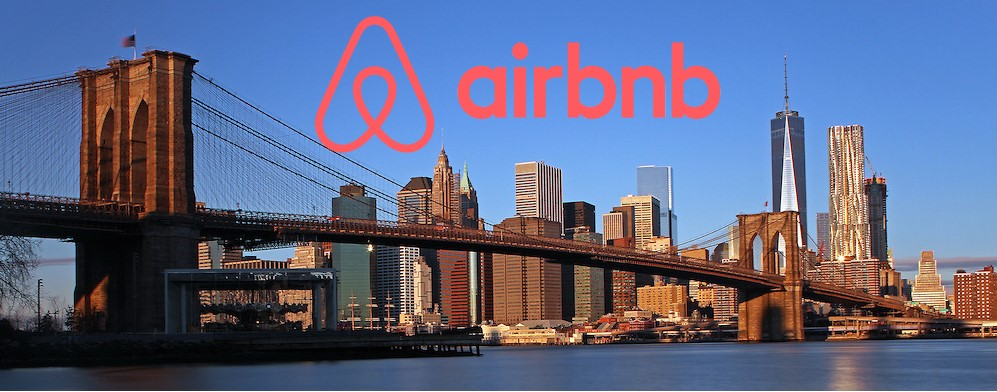

#**About Dataset :**
**Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California, United States. Airbnb offers arrangement for lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.The company is having huge data of guests and hosts(Guesthouse/Hotel owners) of New York City.This data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. Before we deep dive into analysis of data we have to look into how data is arranged.So lets check the quality of oil.**

# **Basic Information :**
**This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.**

# **Importing Libraries :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset :**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/IMPORT/AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Checking Information :**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Checking Null Values :**

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['host_name'], inplace=True)

# **Here [last_review,reviews_per_month] Column Null Values Can't Be Replacable as it effects the dataset .**

In [6]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **Exploratory Data Analysis And Data Visualization :**

# **Q1.How many unique neighborhoods_groups are represented in the dataset ?**

In [7]:
unique_values_group = df['neighbourhood_group'].unique()
unique_values_group

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
value_counts_group = df['neighbourhood_group'].value_counts()
value_counts_group

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

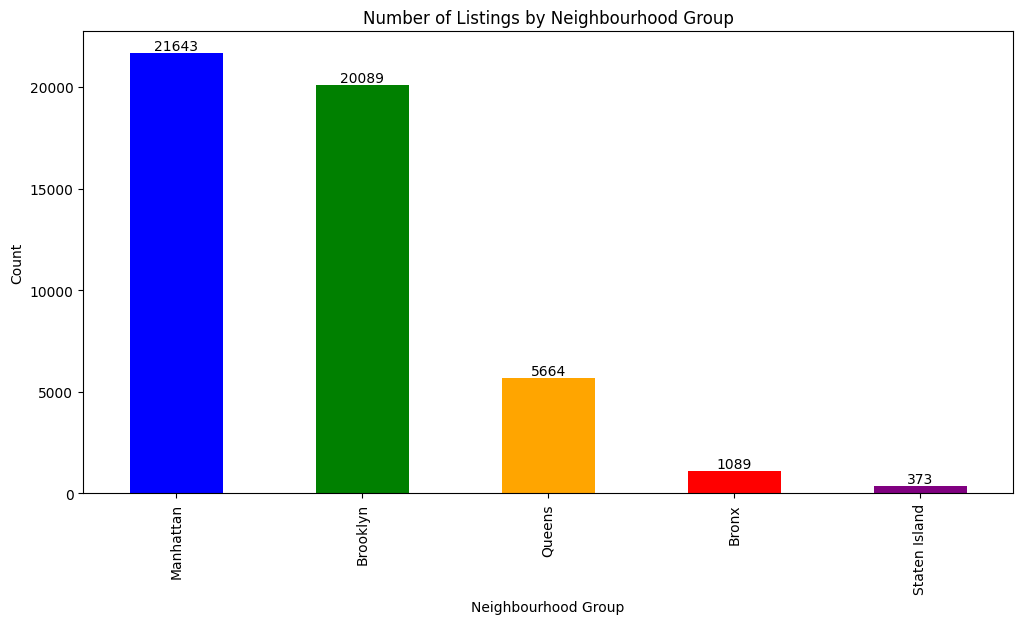

In [9]:
plt.figure(figsize=(12, 6))  # Set the figure size
# Plotting the bar chart with different colors
value_counts_group.plot.bar(color=['blue', 'green', 'orange', 'red', 'purple'])

# Adding value labels to the bars
for i, value in enumerate(value_counts_group.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Number of Listings by Neighbourhood Group')
plt.show()

# **Q2.What are the unique room types available in the listings ?**

In [10]:
unique_room_types = df['room_type'].unique()
unique_room_types

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# **Q3.How many and which room types are there in neighbourhood group ?**

In [11]:
room_types_by_group = df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
room_types_by_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,378,652,59
Brooklyn,9553,10123,413
Manhattan,13190,7973,480
Queens,2096,3370,198
Staten Island,176,188,9


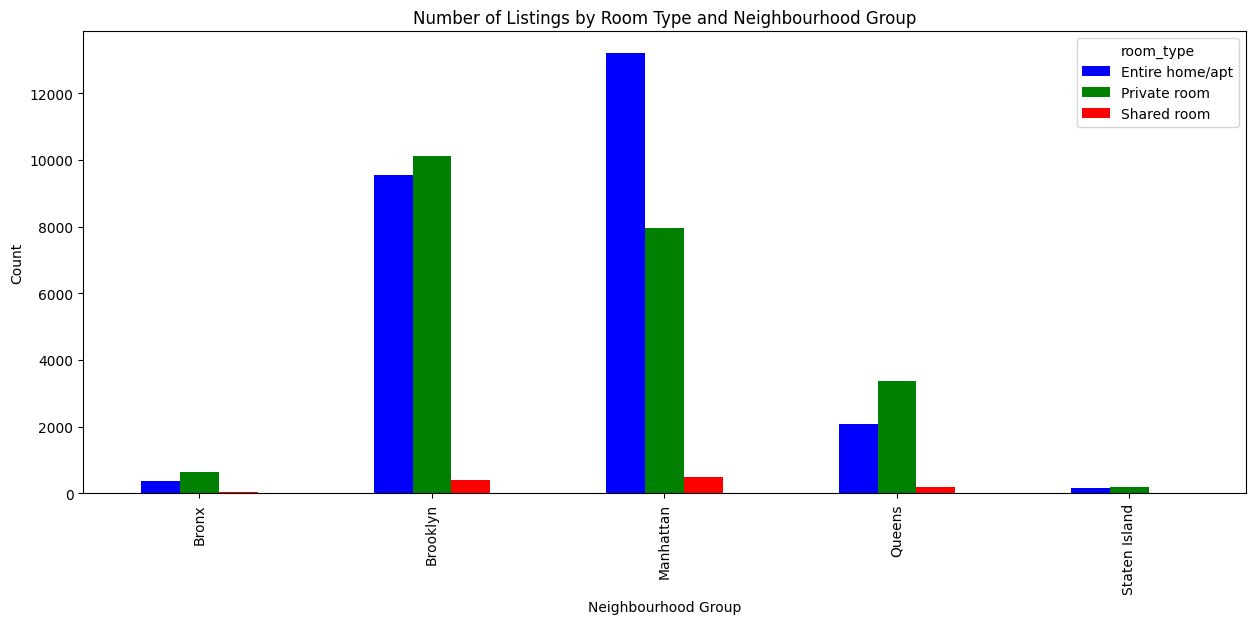

In [12]:
colors = ['blue', 'green', 'red']

# Set the figsize
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the bar graph
room_types_by_group.plot.bar(ax=ax, color=colors)

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type and Neighbourhood Group')

# Show the plot
plt.show()

# **Q4.Which neighborhood group has the highest number of reviews?**

In [13]:
reviews_by_neighbourhood_group = df.groupby('neighbourhood_group')['number_of_reviews'].sum()
reviews_by_neighbourhood_group

neighbourhood_group
Bronx             28334
Brooklyn         486174
Manhattan        454126
Queens           156902
Staten Island     11541
Name: number_of_reviews, dtype: int64

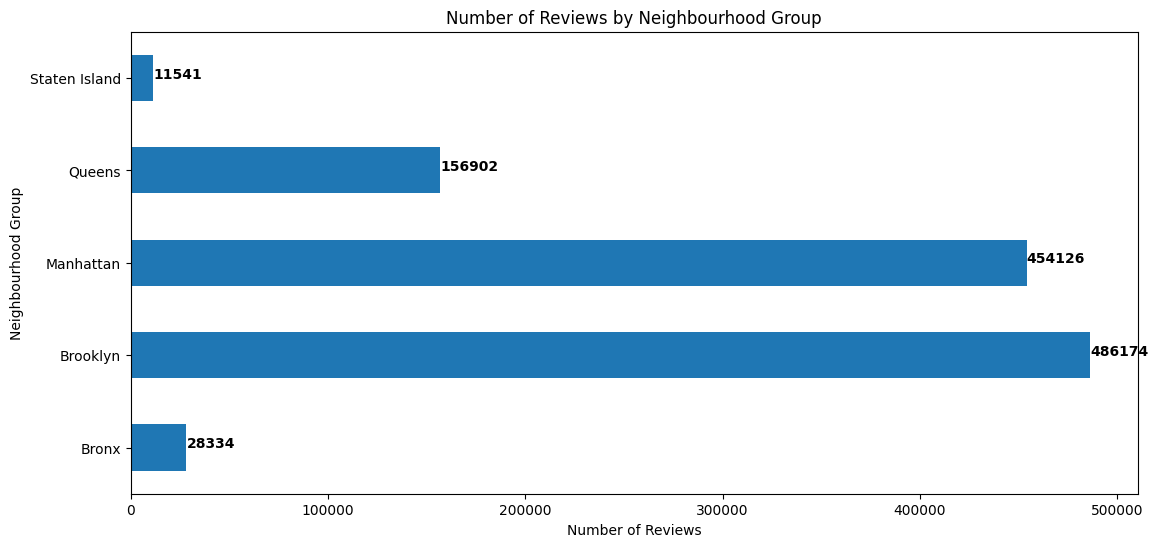

In [14]:
# Set the figure size
fig, ax = plt.subplots(figsize=(13, 6))

# Create the horizontal bar plot
reviews_by_neighbourhood_group.plot(kind='barh', ax=ax)

# Add labels and title
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Neighbourhood Group')
ax.set_title('Number of Reviews by Neighbourhood Group')

# Display the values on the graph
for i, v in enumerate(reviews_by_neighbourhood_group):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

# **Q5.What is the average price for rooms in each neighborhood group ?**

In [15]:
# Calculate the average price for each neighborhood group
average_prices = df.groupby('neighbourhood_group')['price'].mean()
average_prices

neighbourhood_group
Bronx             87.469238
Brooklyn         124.410523
Manhattan        196.897473
Queens            99.536017
Staten Island    114.812332
Name: price, dtype: float64

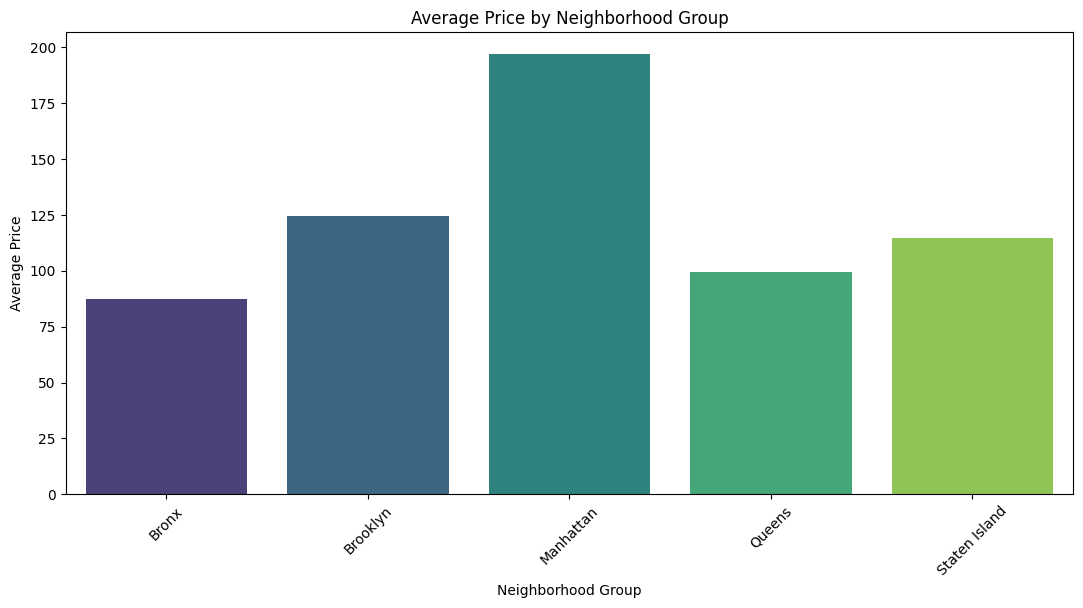

In [16]:
# Plotting the bar graph using seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# **Q6.Which top 10 hosts have maximum listing ?**

In [29]:
top_hosts= df['host_name'].value_counts().head(10)
top_host_df=pd.DataFrame(top_hosts)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_name', 'host_name':'property_count'}, inplace=True)
top_host_df

,host_name,property_count
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


In [30]:
df1 = pd.DataFrame(df.host_name.value_counts())
df1.reset_index(inplace=True)

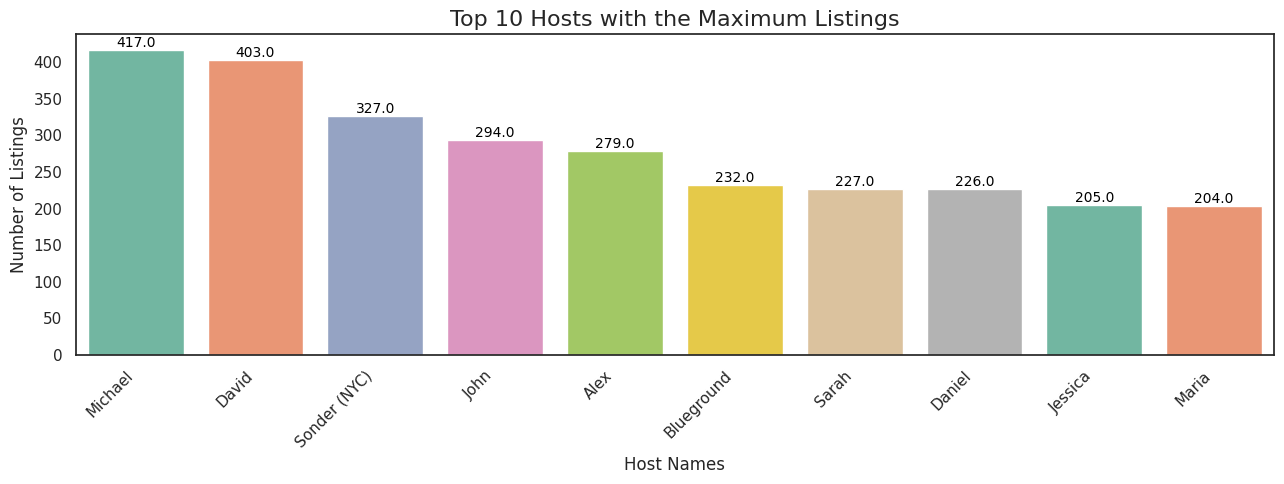

In [31]:
plt.figure(figsize=(13, 5))

# Create a color palette
colors = sns.color_palette('Set2')

# Create the bar plot
host_hist = sns.barplot(x='index', y='host_name', data=df1.head(10), palette=colors)

# Set plot title and axis labels
host_hist.set_title('Top 10 Hosts with the Maximum Listings', fontsize=16)
host_hist.set_ylabel('Number of Listings', fontsize=12)
host_hist.set_xlabel('Host Names', fontsize=12)

# Rotate x-axis labels and adjust alignment
host_hist.set_xticklabels(host_hist.get_xticklabels(), rotation=45, ha='right')

# Add data labels to the bars
for patch in host_hist.patches:
    height = patch.get_height()
    host_hist.annotate(f'{height}', (patch.get_x() + patch.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

# **Q7.Which top 10 hosts has most listing in manhatten ?**

In [17]:
# Assuming you have loaded the dataset into a DataFrame called 'df'
manhattan_listings = df[df['neighbourhood_group'] == 'Manhattan']
top_10_hosts = manhattan_listings.groupby(['host_id', 'host_name']).size().reset_index(name='listing_count')
top_10_hosts = top_10_hosts.sort_values(by='listing_count', ascending=False).head(10)

In [18]:
top_10_hosts

,host_id,host_name,listing_count
15252,219517861,Sonder (NYC),327
13168,107434423,Blueground,230
8686,30283594,Kara,121
5573,12243051,Sonder,96
6295,16098958,Jeremy & Laura,96
11539,61391963,Corporate Housing,91
7539,22541573,Ken,86
14950,200380610,Pranjal,65
1247,1475015,Mike,52
13452,120762452,Stanley,50


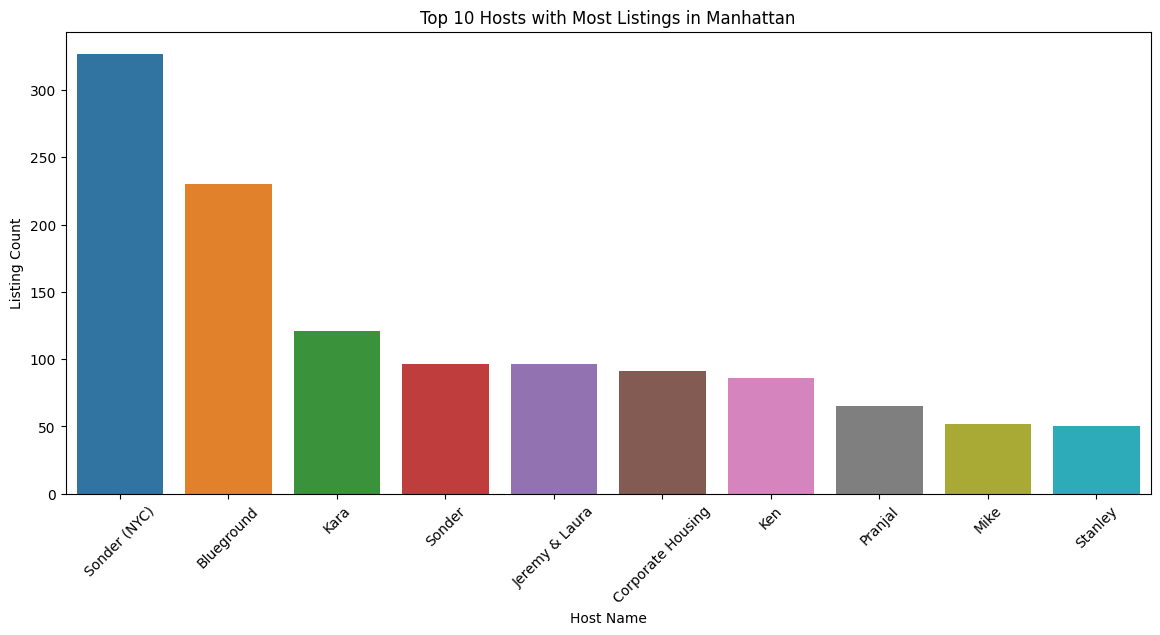

In [19]:
# Create bar graph using Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x='host_name', y='listing_count', data=top_10_hosts)
plt.xlabel('Host Name')
plt.ylabel('Listing Count')
plt.title('Top 10 Hosts with Most Listings in Manhattan')
plt.xticks(rotation=45)
plt.show()

# **Conclusion**
**Throughout this kernel we put in practice many of the strategies. We philosophied about the variables, we analysed 'Price' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier. Now you can take wiser decisions to make your profit or to save your money!**